In [1]:
import os
import sys
import time
import h5py
import numpy as np
from datetime import datetime, timedelta
from scipy.interpolate import RegularGridInterpolator

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du

In [4]:
with h5py.File(save_dir+'CNN_domain.hdf', 'r') as h5io:
    lon_01 = h5io['lon_01'][...]
    lat_01 = h5io['lat_01'][...]
    elev_01 = h5io['elev_01'][...]
    lon_GFS = h5io['lon_GFS'][...]
    lat_GFS = h5io['lat_GFS'][...]

In [5]:
year = 2023
LEADs = [6,]

In [6]:
name_save = '/glade/campaign/cisl/aiml/ksha/NBlend_save/NB_{}_ini00_f{:02d}.hdf' #.format(year, lead)

In [7]:
lead = LEADs[0]

with h5py.File(name_save.format(year, lead)) as h5io:
    APCP_q = h5io['APCP_q'][...]

In [8]:
APCP_q.shape

(300, 99, 256, 576)

In [32]:
hr_to_lr = RegularGridInterpolator((lat_01[:, 0], lon_01[0, :]), APCP_q[0, 0, ...], bounds_error=False, fill_value=np.nan)

temp = hr_to_lr((lat_GFS, lon_GFS))

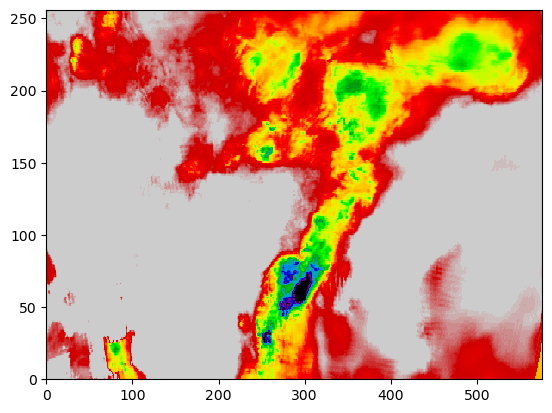

In [13]:
plt.pcolormesh(APCP_q[-1, -1, ...], vmin=0, vmax=50, cmap=plt.cm.nipy_spectral_r)

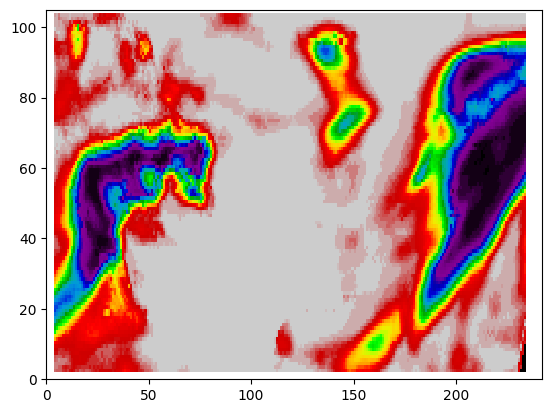

In [34]:
plt.pcolormesh(temp, vmin=0, vmax=100, cmap=plt.cm.nipy_spectral_r)